In [53]:
from main import run_etl
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# run only once
# run_etl()

In [55]:
df = pd.read_csv("data.csv")
df.head()

,job_title,employer_name,job_publisher,job_employment_type,job_description
0,Senior Cloud Solutions Engineer,Long View Systems,Trabajo.org,Full-time,About Long View Systems\n\nWe are proud of our...
1,Cloud Data Engineer,"GTT, LLC",Trabajo.org,Full-time,We are seeking a talented Cloud Data Engineer ...
2,Senior Cloud Engineer,AIMCo (Alberta Investment Management Corporation),Glassdoor,Full-time,"CLOSING DATE:\n\nFebruary 15, 2025\n\nOpportun..."
3,"Cloud Security Engineer, Deloitte Global Techn...",Deloitte,LinkedIn,Full-time,Job Type: PermanentWork Model: RemoteReference...
4,AWS DevOps Specialist,Riva,Trabajo.org,Full-time,"At Riva, we value diversity, equity, inclusion..."


In [56]:
df['azure'] = df['job_description'].str.contains('azure', case=False, na=False).astype(int)
df['aws'] = df['job_description'].str.contains('aws | amazon', case=False, na=False).astype(int)
df['gcp'] = df['job_description'].str.contains('gcp | google cloud', case=False, na=False).astype(int)

In [57]:
# remove rows with no mention of any cloud provider
df_filtered = df[(df["azure"] != 0) | (df["aws"] != 0) | (df["gcp"] != 0)]

df_filtered.head()

,job_title,employer_name,job_publisher,job_employment_type,job_description,azure,aws,gcp
2,Senior Cloud Engineer,AIMCo (Alberta Investment Management Corporation),Glassdoor,Full-time,"CLOSING DATE:\n\nFebruary 15, 2025\n\nOpportun...",1,0,0
3,"Cloud Security Engineer, Deloitte Global Techn...",Deloitte,LinkedIn,Full-time,Job Type: PermanentWork Model: RemoteReference...,1,0,1
4,AWS DevOps Specialist,Riva,Trabajo.org,Full-time,"At Riva, we value diversity, equity, inclusion...",0,1,0
6,Cloud DevOps Engineer and Python Automation,Aplin,Jooble,Full-time,If you are a talented and experienced Cloud De...,1,0,1
7,Senior Cloud and Full Stack Developer,Vantix Systems Inc.,Trabajo.org,Full-time,Position Overview\n\nVantix Systems Inc. is se...,1,1,0


  Cloud Provider  Count
0          azure     19
1            aws     11
2            gcp      5


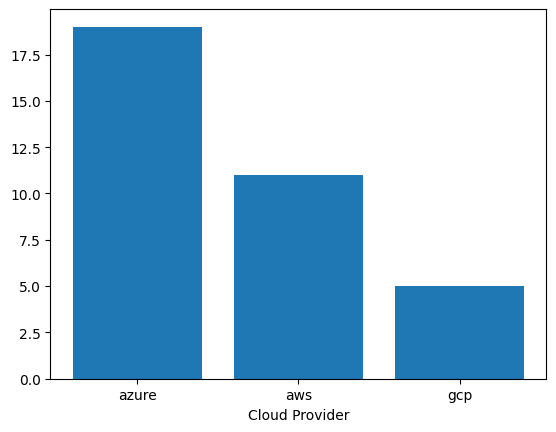

In [58]:
counts = df[["azure", "aws", "gcp"]].sum().reset_index()
counts.columns = ["Cloud Provider", "Count"]

print(counts)

# Create a bar chart using Matplotlib
plt.bar(counts["Cloud Provider"], counts["Count"])
plt.xlabel("Cloud Provider")
plt.show()